# Full evolutionary trajectory

In [1]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap
from collections import defaultdict
import matplotlib.gridspec as gridspec
import numpy as np

import estaudel.escaffolding as escaffolding
import estaudel.stochastic as stochastic
import estaudel.heredity.process as ehp
import estaudel.heredity.deterministic as ehd
import estaudel.heredity.stochastic as ehs

import os 
from config import FIGPATH, PANEL_DICT

# Data

These dataset are not included on the git repo (they are heavy) but they can be generated using the script `full_trajectory.py`

I.e. :
```bash
full_trajectory.py --selection "neutral"
full_trajectory.py --selection "rank"
```

In [2]:
path_selection = "data/full_trajectory/full_trajectory.321.1_20180629_163801_selection\"rank\"_NPROC8.pkle"
path_neutral = "data/full_trajectory/full_trajectory.321.5_20180629_163801_NPROC8_selection\"neutral\".pkle"
prefix_out = "one"

In [3]:
data = (escaffolding.load(path_neutral), escaffolding.load(path_selection))

In [4]:
for d in data:
    print(d)
    print("\n".join(["{}: {}".format(k,v) for k,v in sorted(d.parameters.items())]))
    print('-'*80)

Ecological scaffolding data 9999 generations
B: 15
D: 1000
N: 10000
NPROC: 8
T: 1
carrying_capacity: 1500
collectiveSelectionStrength: 1
continue: None
goal: 0.5
initial_type0: (0, 6, 0.8, 0.15)
initial_type1: (1, 4, 0.3, 0.15)
max_types: 4
mutation_effect: {1: 0.1, 3: 0.1}
mutation_rate: 1
name: out/full_trajectory.321.5
percentile: 20
selection: neutral
skip: 100
steps: 100
--------------------------------------------------------------------------------
Ecological scaffolding data 9999 generations
B: 15
D: 1000
N: 10000
NPROC: 8
T: 1
carrying_capacity: 1500
collectiveSelectionStrength: 1
continue: None
goal: 0.5
initial_type0: (0, 6, 0.8, 0.15)
initial_type1: (1, 4, 0.3, 0.15)
max_types: 4
mutation_effect: {1: 0.1, 3: 0.1}
mutation_rate: 1
name: out/full_trajectory.321.1
percentile: 20
selection: rank
skip: 100
steps: 100
--------------------------------------------------------------------------------


# Individual and collectvie traits

In [5]:
# Show a more detailed plot for the first Nbreak generations
Nbreak = 30

In [6]:
# -------Axes limits-------
# Compute the maximal value of each trait, for axes limits. 
mx_trait = {}
for k in ('growth_rate','interaction_inter'):
    mx_trait[k] = (np.min([d.data['individual_traits_bins'][k].min() for d in data]),
                 np.max([d.data['individual_traits_bins'][k].max() for d in data]))

# Compute the maximum density and number of collectives 
mx = 0
D = 0
for d in data:
    D = max(D, d.parameters['D'])
    for k in d.data['individual_traits_density'].keys():
            mx = max(mx,d.data['individual_traits_density'][k].max())

# Bins for the colormap. 
rounder = np.vectorize(lambda x : round(x, -int(np.floor(np.log10(abs(x))))))

zbin = np.int_(rounder(list(np.logspace(0,np.log10(mx),10,base=10)[3:])))
zbin_names = ['{}k'.format(int(x)//1000) if x>1000 else x for x in zbin]

zbin_cp = [0.0000001]+list(np.logspace(0,np.log10(D),20,base=10))
zbin_cp = [-100,1]+list(np.logspace(1,np.log10(data[0].parameters['D']),20,base=10))
cmap_cp = np.array([(0,0,0,0)] + list(plt.cm.viridis_r(np.linspace(0,1,len(zbin_cp)))))

In [7]:
mx = 0
D = 0
for i in [0,1]:
    D = max(D, data[i].parameters['D'])
    for pos in (1,3):
        for color in (0,1):
            mx = max(mx,data[i].data['individual_traits_density'][(ehs.COLOR_NAMES[color],
                                                                   ehs.POS_NAMES[pos])].max())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


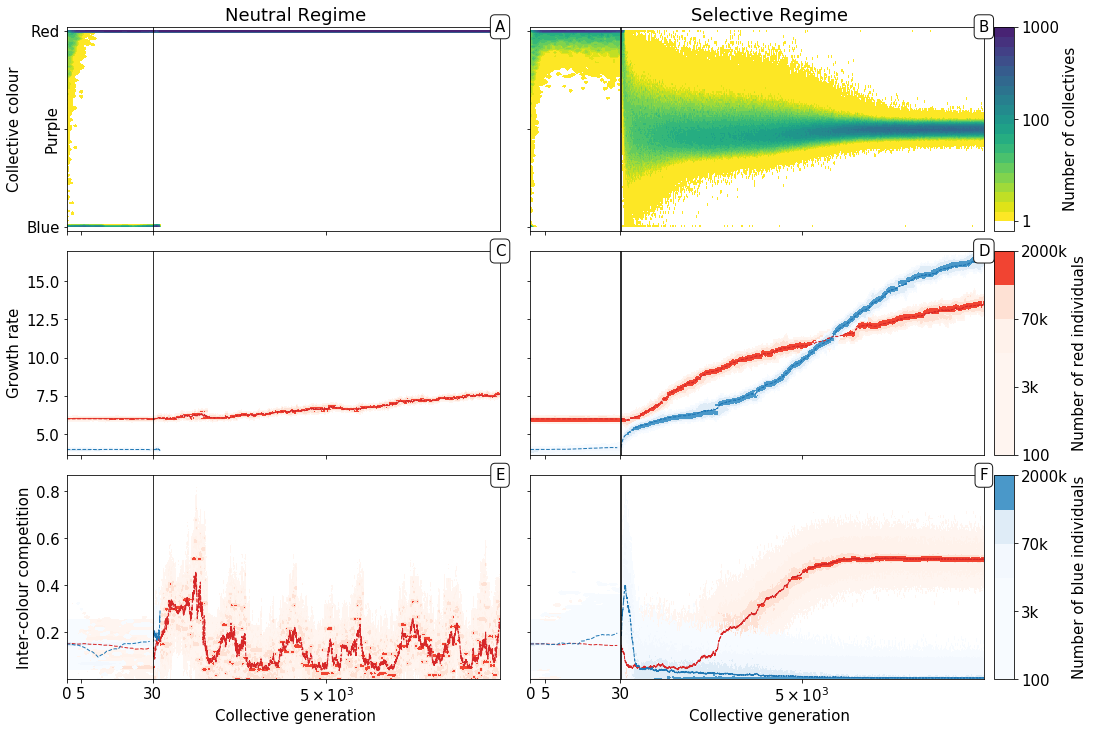

In [8]:
plt.rc('font', size=15)
fig = plt.figure(figsize=(14,12))
tk =  [1,100,1000]
labels = ['ACE','BDF']

#-------- Set the axis structure ---- ###
gs = [gridspec.GridSpec(nrows=3, ncols=5, left=0.05, right=0.48,
                        wspace=0.01, hspace=0.1),
      gridspec.GridSpec(nrows=3, ncols=5, left=0.51, right=0.96,
                         wspace=0.01, hspace=0.1)]
g = gridspec.GridSpec(nrows=3, ncols=1, left=0.97, right=0.99,
                 wspace=0.01, hspace=0.1)

cax = []
cax.append(fig.add_subplot(g[0, 0]))
cax.append(fig.add_subplot(g[1, 0]))
cax.append(fig.add_subplot(g[2, 0]))
# ---------#

xcenter = 0.41
title = ['Neutral Regime', 'Selective Regime']
for i in (0,1):

    ax = []
    ax.append(fig.add_subplot(gs[i][0, 0]))
    ax.append(fig.add_subplot(gs[i][0, 1:]))
    
    ax.append(fig.add_subplot(gs[i][1, 0]))
    ax.append(fig.add_subplot(gs[i][1, 1:]))
    
    ax.append(fig.add_subplot(gs[i][2, 0]))
    ax.append(fig.add_subplot(gs[i][2, 1:]))
    ylabel_font = fontdict={'fontweight': 'normal', 'size':'x-large'}

    for j,x in enumerate([1,3,5]):
        if j==2:
            lab = ax[x].set_xlabel('Collective generation',)
            plt.setp(lab, position=(xcenter,plt.getp(lab, 'position')[1]))
        ax[x].set(yticks=[],
                  xticks=[5000,10000],
                  xticklabels=[r'$5 \times 10^3$','$10^4$'] if j==2 else [])
        ax[x].annotate(labels[i][j], **PANEL_DICT)
    for j,x in enumerate([0,2,4]):
        ax[x].set(xticks=[0,5,Nbreak],
                 xticklabels=[0,5,Nbreak] if j==2 else [])

    
    ticks = ax[0].set(ylim=(1.02,-.02), yticklabels=['Blue','Purple','Red'] if i==0 else ['','',''], yticks=[1,0.5,0])
    plt.setp(ticks[1][1], rotation= 90, horizontalalignment='right',  verticalalignment='center')

    ax[1].set(ylim=(1.02,-.02), yticks=[])
    ax[2].set(ylim = mx_trait['growth_rate'])
    ax[3].set(ylim = mx_trait['growth_rate'])
    ax[4].set(ylim = mx_trait['interaction_inter'])
    ax[5].set(ylim = mx_trait['interaction_inter'])
    
    if i==0:
        ax[2].set_ylabel('Growth rate', )
        ax[0].set_ylabel('Collective colour', )
        ax[4].set_ylabel('Inter-colour competition', )
    else:
        ax[2].set_yticklabels([])
        ax[0].set_yticklabels([])
        ax[4].set_yticklabels([])
    titl = ax[1].set_title(title[i], )
    plt.setp(titl, position=(xcenter,plt.getp(titl, 'position')[1]))

    
    ###### ------------- ####
    if True:
        cp_density = (data[i].data['cp_density'] * data[i].parameters['D'])
        individual_traits_density = data[i].data['individual_traits_density']
        individual_traits_bins = data[i].data['individual_traits_bins']

    ## Plot collective density 
    # Before the break
    
        im = ax[0].contourf(cp_density[:,:Nbreak],
               extent=[0,Nbreak,0,1],
                levels=zbin_cp,
               colors=cmap_cp)
        # After the break. 
        im = ax[1].contourf(cp_density[:,Nbreak:],
                       extent=[Nbreak,cp_density.shape[1],0,1],
                        levels=zbin_cp,
                       colors=cmap_cp)
        # Color bar collectives
        if i == 0:
            cbar = fig.colorbar(im,ax=ax[0],cax=cax[0], 
                         ticks=tk,
                         )
            cbar.ax.set_ylabel('Number of collectives', )
            cbar.ax.set_yticklabels([x if x>0 else 0 for x in tk]) 

    ## Plot particle densities 
    CMAP_LIST = [plt.cm.Reds, plt.cm.Blues]
    if True:
        for pos,axid in zip((1,3), (2,4)):
            for color in (0,1):
                key = (ehs.COLOR_NAMES[color], ehs.POS_NAMES[pos])
                cm = CMAP_LIST[color](np.arange(CMAP_LIST[color].N))

                d = data[i].data['individual_traits'][key]
                d['c'] = d.value*d.number
                values = (d.groupby('generation').sum()['c']/d.groupby('generation').sum()['number']).values

                cm = ListedColormap(cm)

                # Plot average 
                ax[axid].plot(np.arange(0,Nbreak), 
                              values[:Nbreak],
                              color=['C3','C0'][color],
                             ls='--', lw=1,)
                ax[axid+1].plot(np.arange(Nbreak,individual_traits_density[key].shape[1]), 
                              values[Nbreak:],
                             color=['C3','C0'][color],
                             ls='--',lw=1,)

                im = ax[axid].contourf(individual_traits_density[key][:,:Nbreak], 
                     extent=[0,
                             Nbreak,
                             individual_traits_bins[key[1]].min(),
                             individual_traits_bins[key[1]].max()], 
                             levels=zbin,
                             cmap=cm)
                im = ax[axid+1].contourf(individual_traits_density[key][:,Nbreak:], 
                                 extent=[Nbreak,
                                         individual_traits_density[key].shape[1],
                                         individual_traits_bins[key[1]].min(),
                                         individual_traits_bins[key[1]].max()], 
                                 levels=zbin,
                                 cmap=cm)

                if i == 0 and pos == 1:
                    cb = fig.colorbar(im,ax=ax[axid],
                                      cax=cax[1+color],
                                      ticks=zbin[::2])
                    cax[1+color].set_ylabel('Number of {} individuals'.format(ehs.COLOR_NAMES[color]),
                                            ) 
                    cax[1+color].set_yticklabels(zbin_names[::2]) 

plt.tight_layout()
fig.savefig(os.path.join(FIGPATH,'full_trajectory.png'), bbox_inches='tight')
#fig.savefig(os.path.join(FIGPATH,'full_trajectory_hirez.png'), dpi=600, bbox_inches='tight')